In [109]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [9]:
url = 'https://en.wikipedia.org/wiki/List_of_deaths_from_drug_overdose_and_intoxication'
page=requests.get(url)
soup= BeautifulSoup(page.text,'html.parser')

In [10]:
table=soup.find_all('table')

In [35]:
titles=soup.find_all('th')[1:6]

In [36]:
titles

[<th scope="col">Born
 </th>,
 <th scope="col">Died
 </th>,
 <th scope="col">Age
 </th>,
 <th scope="col">Profession
 </th>,
 <th scope="col">Drug(s)
 </th>]

In [37]:
table_titles=[titles.text.strip() for titles in titles]


In [38]:
table_titles

['Born', 'Died', 'Age', 'Profession', 'Drug(s)']

In [39]:
df=pd.DataFrame(columns=table_titles)

In [40]:
df

,Born,Died,Age,Profession,Drug(s)


In [73]:
column_data=soup.find_all('tr')

for row in column_data[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data[0:5]][0:6]
    
    length = len(df)
    df.loc[length]= individual_row_data

In [74]:
df

,Born,Died,Age,Profession,Drug(s)
0,1941,1995,54,Artist,Unspecified
1,1955,1996,41,Wrestling promoter,Cocaine
2,1864,1916,52,Actress,Morphine
3,1980,2010,29,Wrestler,Unspecified
4,1908,1970,61,Playwright,Barbiturates
...,...,...,...,...,...
624,1984,1997,13,Student,Dextropropoxyphene
625,1965,2001,36,Boxer,Unspecified
626,1904,1958,53,Actor,Unspecified
627,1948,1973,25,Musician,Heroin


In [75]:
df0=df.copy()

In [76]:
df0

,Born,Died,Age,Profession,Drug(s)
0,1941,1995,54,Artist,Unspecified
1,1955,1996,41,Wrestling promoter,Cocaine
2,1864,1916,52,Actress,Morphine
3,1980,2010,29,Wrestler,Unspecified
4,1908,1970,61,Playwright,Barbiturates
...,...,...,...,...,...
624,1984,1997,13,Student,Dextropropoxyphene
625,1965,2001,36,Boxer,Unspecified
626,1904,1958,53,Actor,Unspecified
627,1948,1973,25,Musician,Heroin


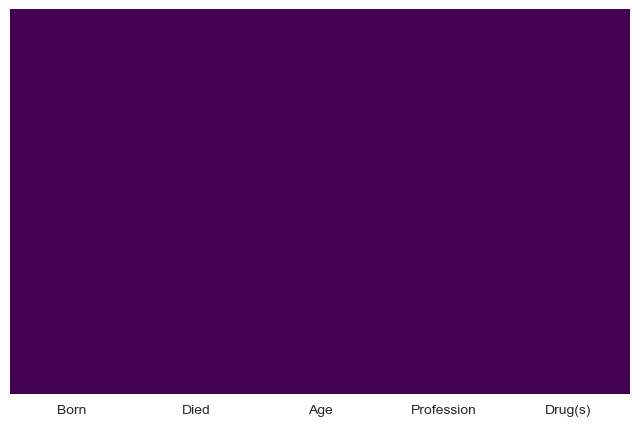

In [78]:
sns.heatmap(df0.isnull(),yticklabels=False,cbar=False,cmap='viridis');